In [1]:
import warnings
warnings.filterwarnings('ignore')

import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import xgboost as xgb

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

sns.set()
%matplotlib inline

In [49]:
df=pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [50]:
df.shape

(2938, 22)

In [51]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [53]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [55]:
df.duplicated().sum()

0

In [56]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [57]:
df.columns = df.columns.str.strip()

In [58]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [59]:
num_columns=df.select_dtypes(include=['int','float'])
num_columns.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [60]:
cat_columns=df.select_dtypes(include =["object"])
cat_columns.head()

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing


In [61]:
df_corr = num_columns.corr()
df_corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


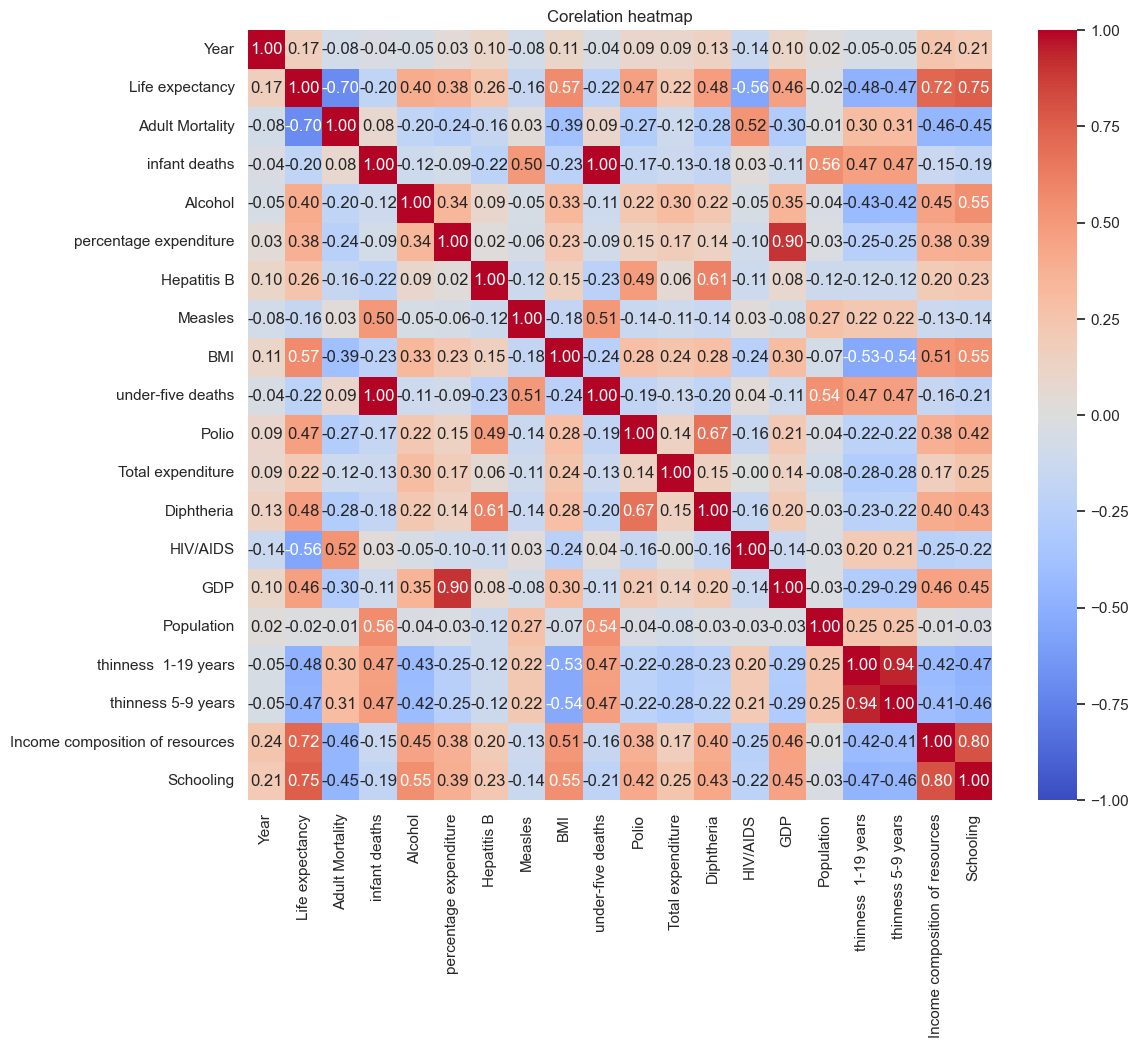

In [62]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr, annot=True , fmt=".2f", cmap ="coolwarm", vmin=-1,vmax=1)
plt.title("Corelation heatmap")
plt.show()

In [63]:
#Countries with Highest Life Expectancy
country_vs_life = df.groupby('Country', as_index=False)['Life expectancy'].mean()
country_vs_life.sort_values(by = 'Life expectancy', ascending=False).head(10)

,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [64]:
country_vs_life.sort_values(by = 'Life expectancy', ascending = True).head(10)

,Country,Life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


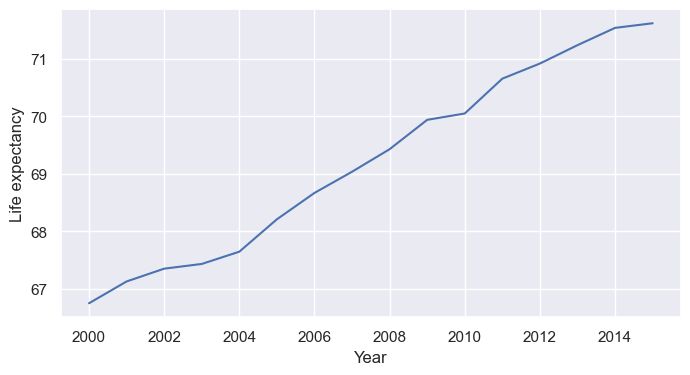

In [65]:
plt.figure(figsize = [8, 4])
mean_life_expectance = df.groupby("Year")["Life expectancy"].mean()
sns.lineplot(data=mean_life_expectance)
plt.show()

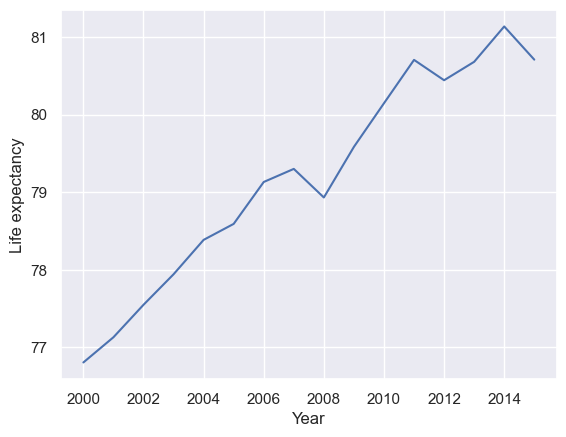

In [66]:
mean_life_expectance = df[df.Status == "Developed"].groupby("Year")["Life expectancy"].mean()
sns.lineplot(data=mean_life_expectance)
plt.show()

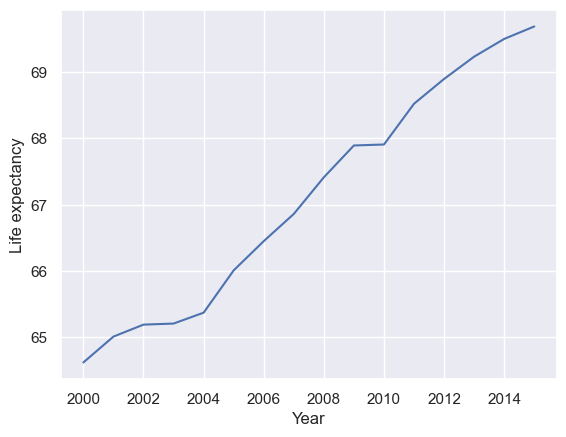

In [67]:
mean_life_expectance = df[df.Status == "Developing"].groupby("Year")["Life expectancy"].mean()
sns.lineplot(data=mean_life_expectance)
plt.show()

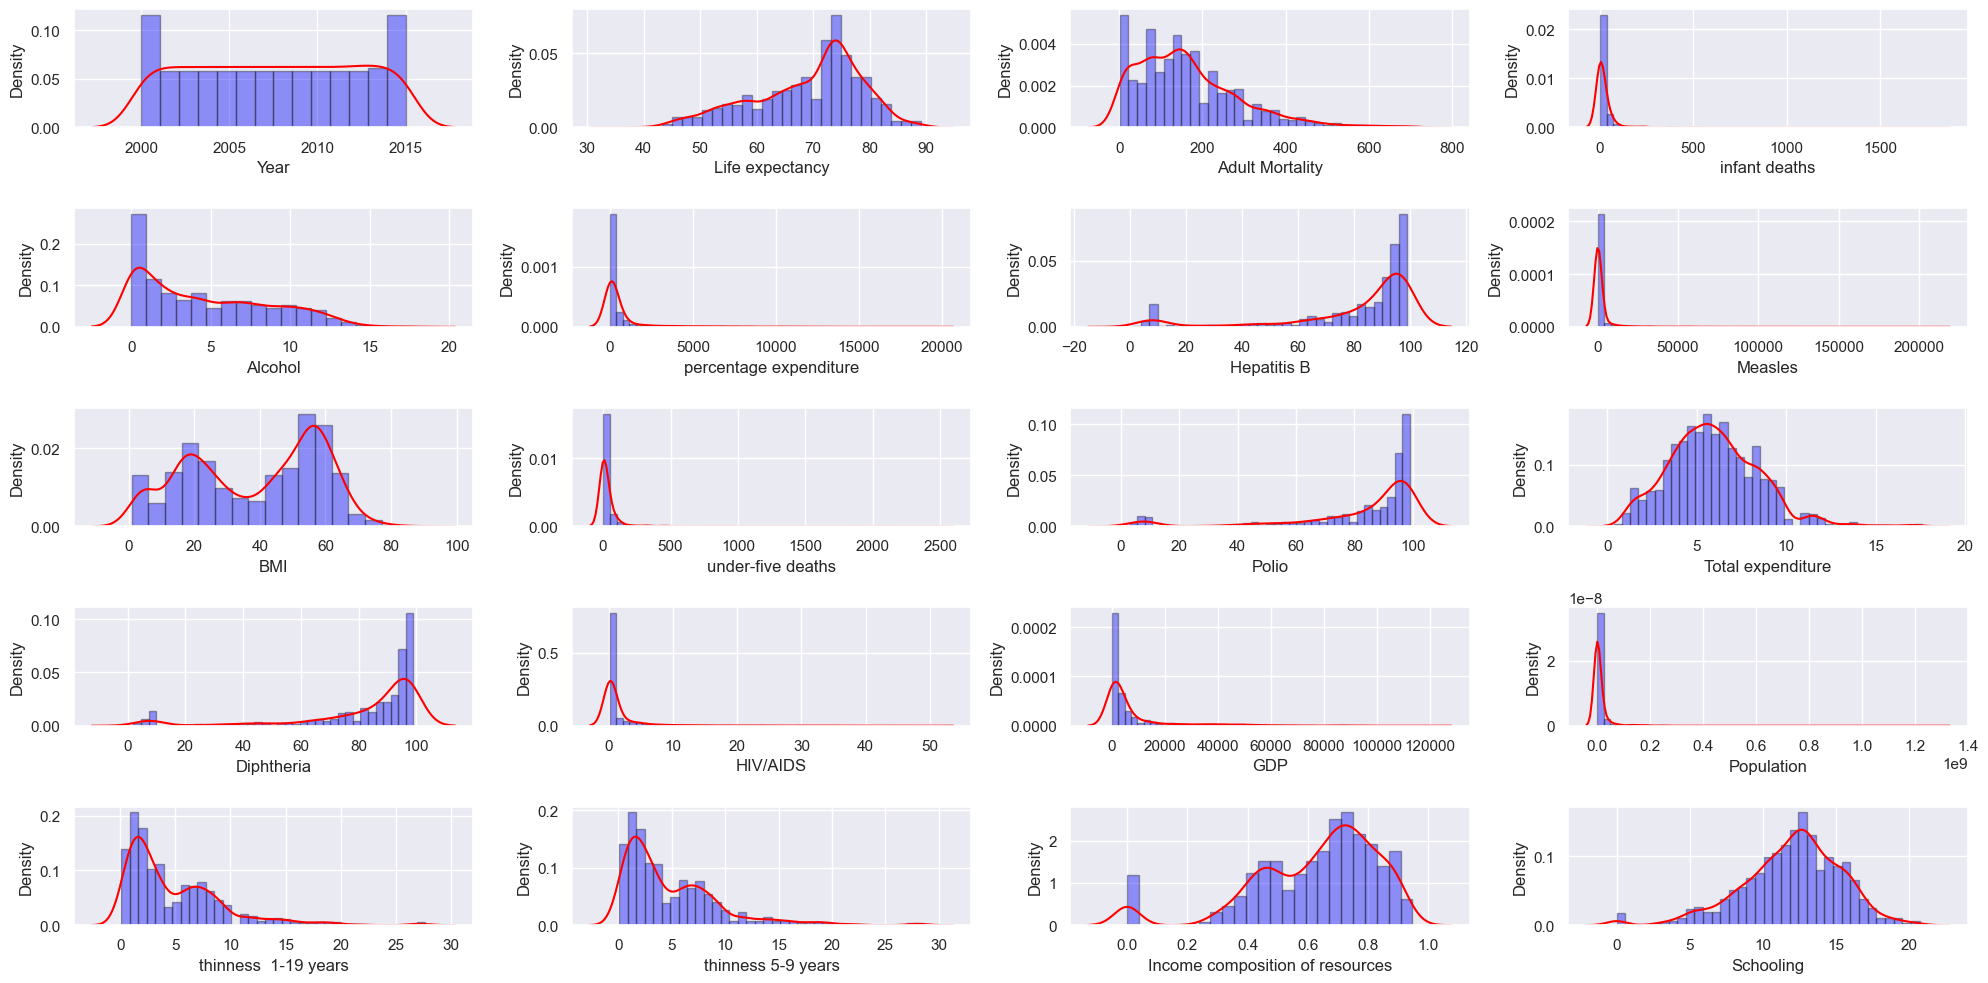

In [68]:
fig = plt.figure(figsize = [20, 10])
cols = df.select_dtypes(exclude=['object']).columns.tolist()

count = 1
for col in cols:
    plt.subplot(5, 4, count)
    sns.distplot(df[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
    count += 1
plt.tight_layout()
plt.show()

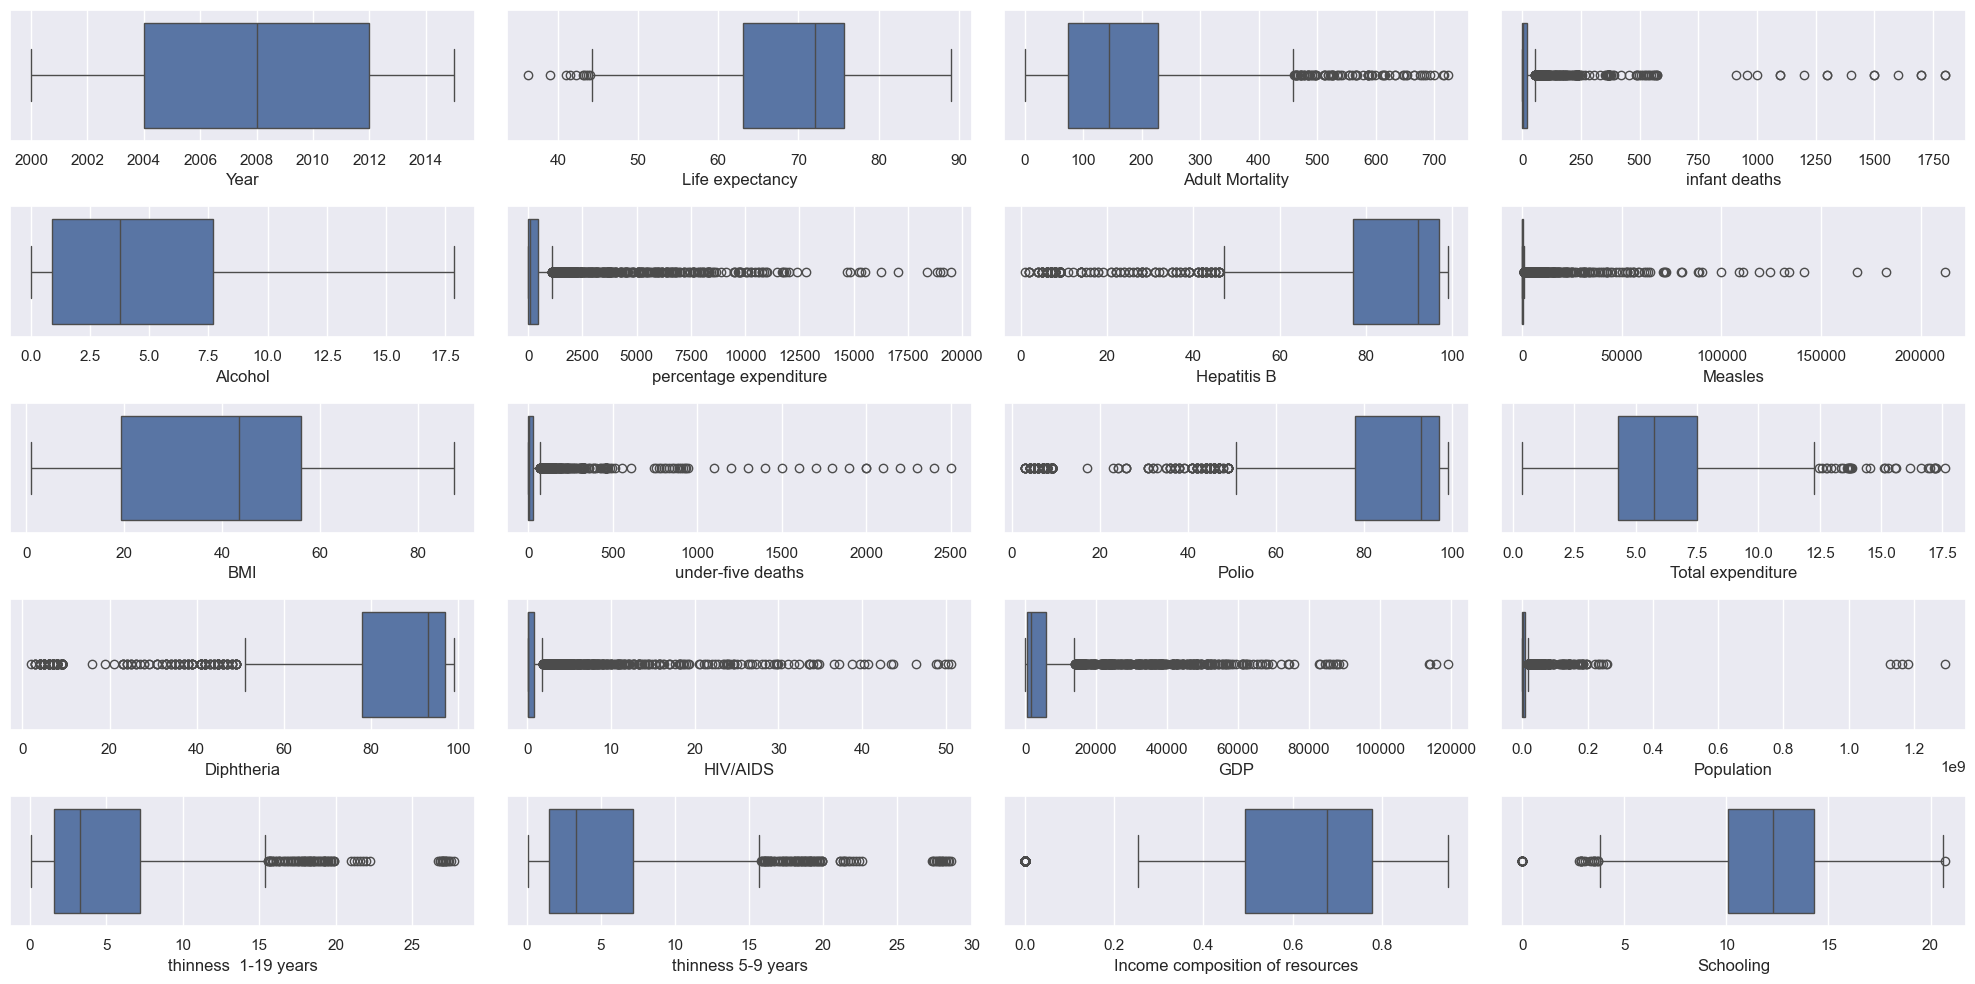

In [25]:
count = 1
fig = plt.figure(figsize = [20, 10])
cols = df.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.boxplot(x = df[col])
    count += 1
plt.tight_layout()
plt.show()

In [69]:
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[cols] < (Q1 - 1.7 * IQR)) | (df[cols] > (Q3 + 1.7 * IQR))).any(axis=1)

df = df[~outliers]

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3


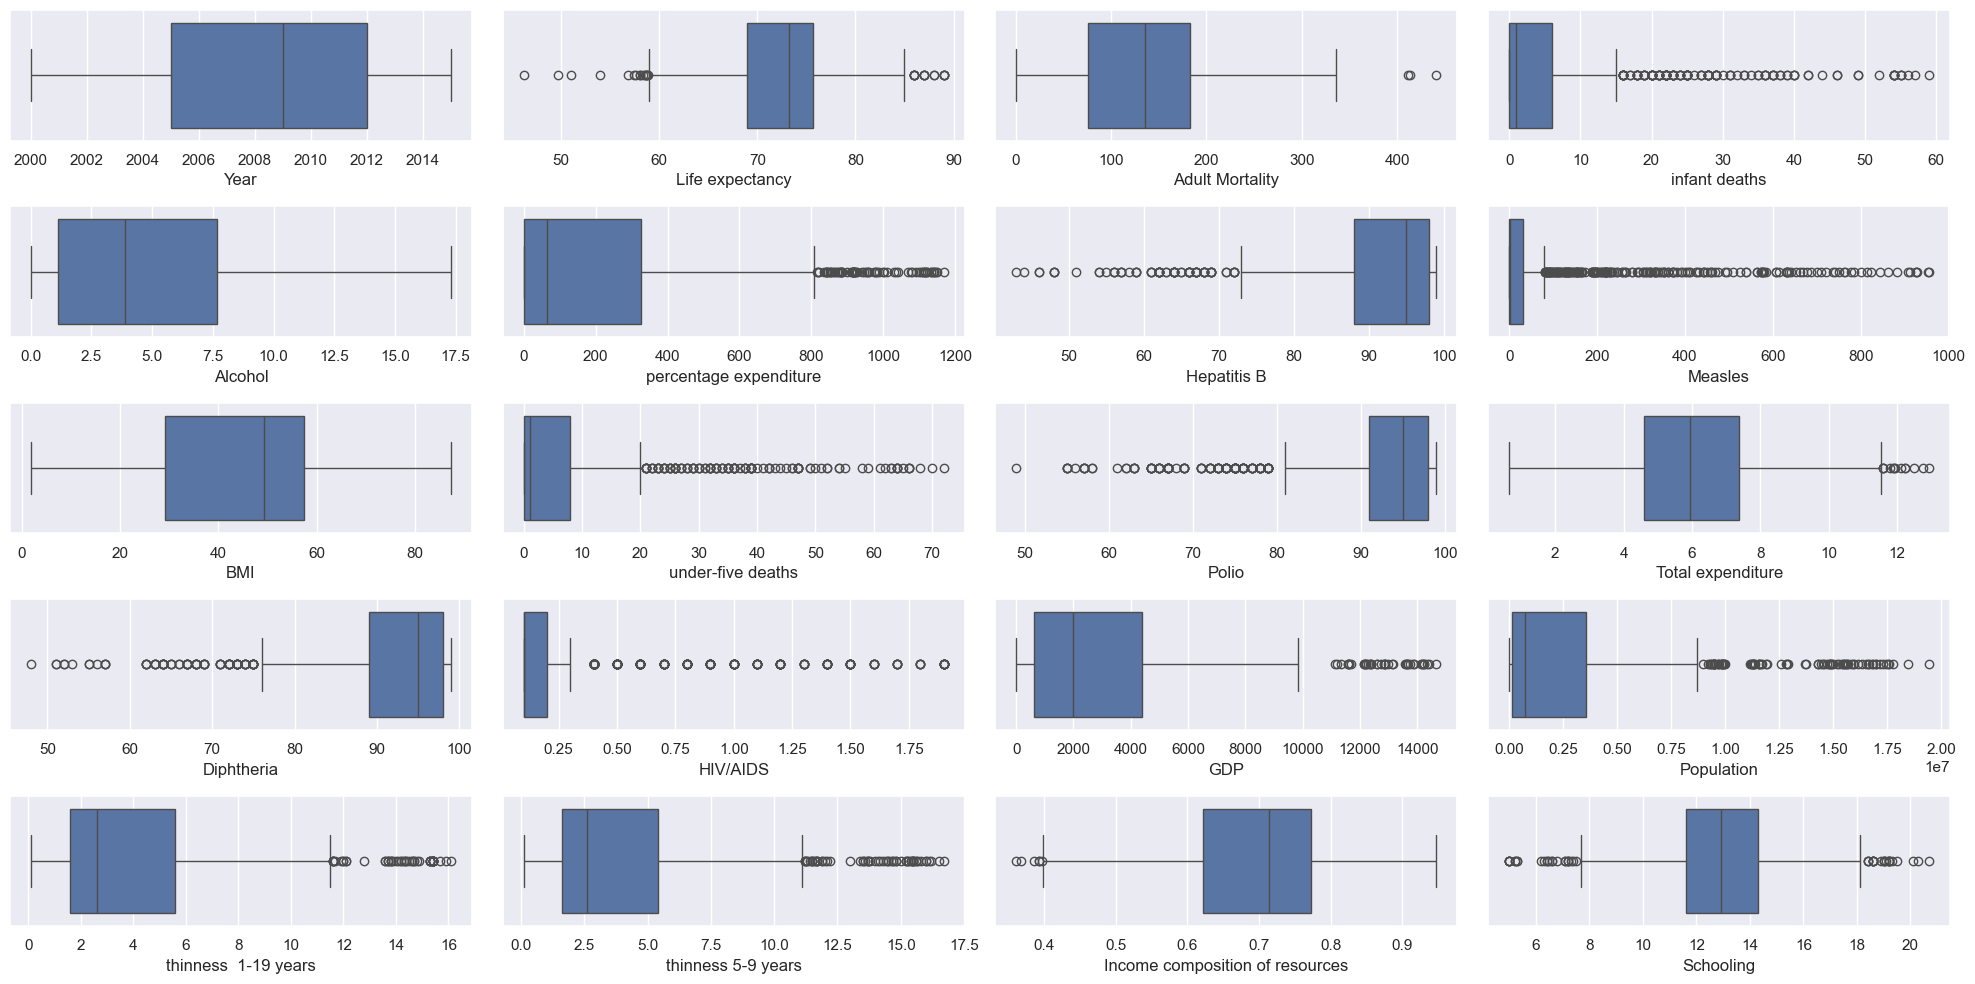

In [70]:
count = 1
fig = plt.figure(figsize = [20, 10])
cols = df.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.boxplot(x = df[col])
    count += 1
plt.tight_layout()
plt.show()

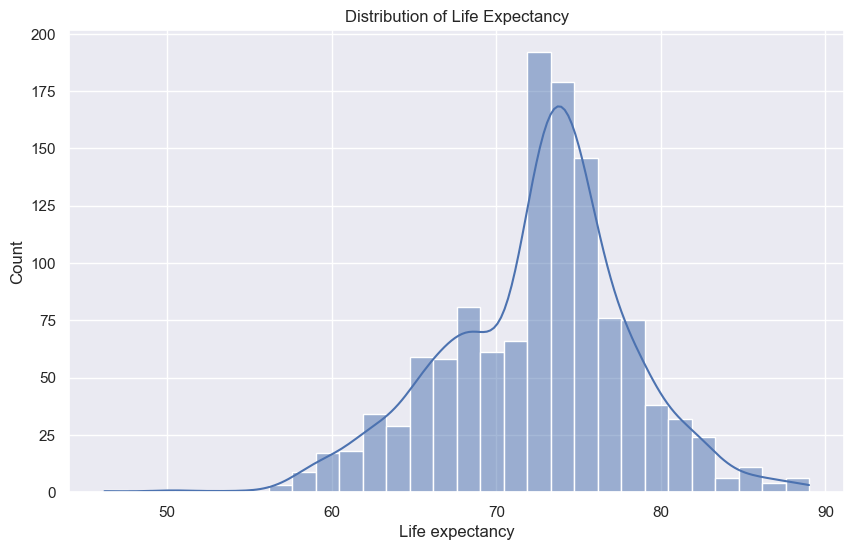

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy'], kde=True, bins=30)
plt.title('Distribution of Life Expectancy')
plt.show()

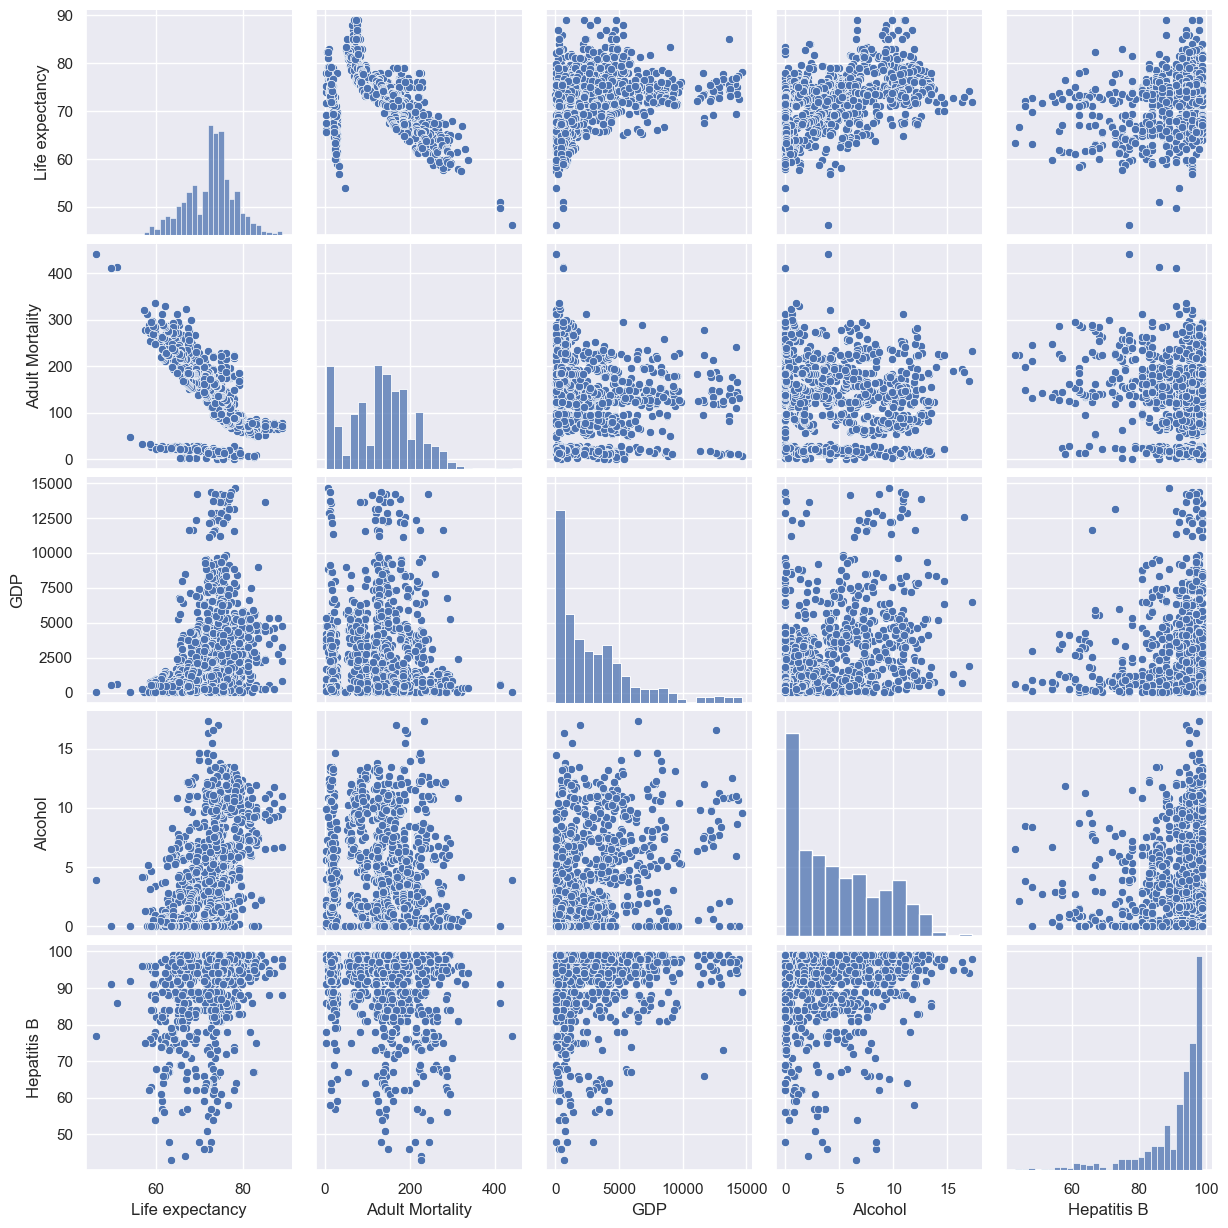

In [71]:
sns.pairplot(df[['Life expectancy', 'Adult Mortality', 'GDP', 'Alcohol', 'Hepatitis B']])
plt.show()

In [72]:
skewness = df.select_dtypes(include=['float64', 'int64']).skew()
print(skewness)

Year                              -0.203564
Life expectancy                   -0.370528
Adult Mortality                    0.151429
infant deaths                      2.835869
Alcohol                            0.570705
percentage expenditure             1.524258
Hepatitis B                       -2.032227
Measles                            3.319929
BMI                               -0.777929
under-five deaths                  2.752581
Polio                             -1.984996
Total expenditure                  0.077980
Diphtheria                        -2.069968
HIV/AIDS                           3.005769
GDP                                1.521106
Population                         1.980172
thinness  1-19 years               1.632855
thinness 5-9 years                 1.661738
Income composition of resources   -0.518651
Schooling                         -0.152125
dtype: float64


In [75]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [76]:
cols = ['Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']

x = df[cols]  
y = df["Life expectancy"]  

In [77]:
x = pd.get_dummies(x, drop_first=True)

In [83]:
x = x.fillna(x.mean())
y = y.fillna(y.mean())

In [84]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [86]:
Linear_model=LinearRegression()
Linear_model.fit(x_train,y_train)
y_train_predict=Linear_model.predict(x_train)
y_test_predict=Linear_model.predict(x_test)

In [87]:
print("Accuracy Scores for Linear Regression model on raw data")
mse=mean_squared_error(y_test,y_test_predict)
rmse = np.sqrt(mse)
r2_Train=r2_score(y_train,y_train_predict)
r2_Test=r2_score(y_test,y_test_predict)
print("Mean Squared Error",mse)
print("Root Mean Squared Error",rmse)
print("R-Squared Score(Train)", r2_Train)
print("R-Squared Score(Test)", r2_Test)
print("**************" * 7)

Accuracy Scores for Linear Regression model on raw data
Mean Squared Error 5.7061963663993e+27
Root Mean Squared Error 75539369645234.0
R-Squared Score(Train) 0.937618961684858
R-Squared Score(Test) -1.894832794405262e+26
**************************************************************************************************


In [88]:
Lasso_model=Lasso()
Lasso_model.fit(x_train,y_train)
y_train_predict=Lasso_model.predict(x_train)
y_test_predict=Lasso_model.predict(x_test)

In [89]:
print("Accuracy Scores for Lasso Regression (L1 Regularization) model on raw data")
mse=mean_squared_error(y_test,y_test_predict)
rmse = np.sqrt(mse)
r2_Train=r2_score(y_train,y_train_predict)
r2_Test=r2_score(y_test,y_test_predict)
print("Mean Squared Error",mse)
print("Root Mean Squared Error",rmse)
print("R-Squared Score(Train)", r2_Train)
print("R-Squared Score(Test)", r2_Test)
print("**************" * 7)

Accuracy Scores for Lasso Regression (L1 Regularization) model on raw data
Mean Squared Error 10.293261491402195
Root Mean Squared Error 3.208311314601841
R-Squared Score(Train) 0.6740151017103514
R-Squared Score(Test) 0.6581959648261275
**************************************************************************************************


In [ ]:
ridge_Regression(L2 Regularisation)

In [105]:
Ridge_model=Ridge()
Ridge_model.fit(x_train,y_train)
y_train_predict=Ridge_model.predict(x_train)
y_test_predict=Ridge_model.predict(x_test)

In [106]:
print("Accuracy Scores for Ridge Regression (L2 Regularization) model on raw data")
mse=mean_squared_error(y_test,y_test_predict)
rmse = np.sqrt(mse)
r2_Train=r2_score(y_train,y_train_predict)
r2_Test=r2_score(y_test,y_test_predict)
print("Mean Squared Error",mse)
print("Root Mean Squared Error",rmse)
print("R-Squared Score(Train)", r2_Train)
print("R-Squared Score(Test)", r2_Test)
print("**************" * 7)

Accuracy Scores for Ridge Regression (L2 Regularization) model on raw data
Mean Squared Error 2.888054296263031
Root Mean Squared Error 1.699427637842527
R-Squared Score(Train) 0.9375093792115473
R-Squared Score(Test) 0.9040975872333086
**************************************************************************************************


In [ ]:
Elastic Net_Regression(L1+L2 Regularisation)

In [94]:
enet_model=ElasticNet()
enet_model.fit(x_train,y_train)
y_train_predict=enet_model.predict(x_train)
y_test_predict=enet_model.predict(x_test)

In [107]:
print("Accuracy Scores for Elastic Net Regression (L1+L2 Regularization) model on raw data")
mse=mean_squared_error(y_test,y_test_predict)
r2_Train=r2_score(y_train,y_train_predict)
r2_Test=r2_score(y_test,y_test_predict)
print("Mean Squared Error",mse)
print("R-Squared Score(Train)", r2_Train)
print("R-Squared Score(Test)", r2_Test)
print("**************" * 7)

Accuracy Scores for Elastic Net Regression (L1+L2 Regularization) model on raw data
Mean Squared Error 2.888054296263031
R-Squared Score(Train) 0.9375093792115473
R-Squared Score(Test) 0.9040975872333086
**************************************************************************************************


In [96]:
dtree_model=DecisionTreeRegressor (max_depth=6)
dtree_model.fit(x_train,y_train)
y_train_predict=dtree_model.predict(x_train)
y_test_predict=dtree_model.predict(x_test)

In [108]:
print("Accuracy Scores for Decision Tree model on raw data")
mse=mean_squared_error(y_test,y_test_predict)
r2_Train=r2_score(y_train,y_train_predict)
r2_Test=r2_score(y_test,y_test_predict)
print("Mean Squared Error",mse)
print("R-Squared Score(Train)", r2_Train)
print("R-Squared Score(Test)", r2_Test)
print("**************" * 7)

Accuracy Scores for Decision Tree model on raw data
Mean Squared Error 2.888054296263031
R-Squared Score(Train) 0.9375093792115473
R-Squared Score(Test) 0.9040975872333086
**************************************************************************************************


In [ ]:
Random Forest regression

In [98]:
rf_model=RandomForestRegressor (n_estimators=500,random_state=1,max_depth=6)
rf_model.fit(x_train,y_train)
y_train_predict=rf_model.predict(x_train)
y_test_predict=rf_model.predict(x_test)

In [109]:
print("Accuracy Scores for Random Forest model on raw data")
mse=mean_squared_error(y_test,y_test_predict)
r2_Train=r2_score(y_train,y_train_predict)
r2_Test=r2_score(y_test,y_test_predict)
print("Mean Squared Error",mse)
print("R-Squared Score(Train)", r2_Train)
print("R-Squared Score(Test)", r2_Test)
print("**************" * 7)

Accuracy Scores for Random Forest model on raw data
Mean Squared Error 2.888054296263031
R-Squared Score(Train) 0.9375093792115473
R-Squared Score(Test) 0.9040975872333086
**************************************************************************************************


In [111]:
xgb_model=xgb.XGBRegressor(random_state = 111, max_depth = 2)
xgb_model.fit(x_train,y_train)
y_train_predict=xgb_model.predict(x_train)
y_test_predict=xgb_model.predict(x_test)

In [112]:
print("Accuracy Scores for XGBoost Regression model on raw data")
mse=mean_squared_error(y_test,y_test_predict)
r2_Train=r2_score(y_train,y_train_predict)
r2_Test=r2_score(y_test,y_test_predict)
print("Mean Squared Error",mse)
print("R-Squared Score(Train)", r2_Train)
print("R-Squared Score(Test)", r2_Test)
print("**************" * 7)

Accuracy Scores for XGBoost Regression model on raw data
Mean Squared Error 2.720226276520947
R-Squared Score(Train) 0.9377836758893171
R-Squared Score(Test) 0.9096705821884062
**************************************************************************************************


In [ ]:
# Support Vector Regression model - Linear kernel
svr_model=SVR(kernel = 'linear')
svr_model.fit(x_train,y_train)
y_train_predict=svr_model.predict(x_train)
y_test_predict=svr_model.predict(x_test)

In [113]:
print("Accuracy Scores for Support Vector Regression  model on raw data")
mse=mean_squared_error(y_test,y_test_predict)
r2_Train=r2_score(y_train,y_train_predict)
r2_Test=r2_score(y_test,y_test_predict)
print("Mean Squared Error",mse)
print("R-Squared Score(Train)", r2_Train)
print("R-Squared Score(Test)", r2_Test)
print("**************" * 7)

Accuracy Scores for Support Vector Regression  model on raw data
Mean Squared Error 2.720226276520947
R-Squared Score(Train) 0.9377836758893171
R-Squared Score(Test) 0.9096705821884062
**************************************************************************************************


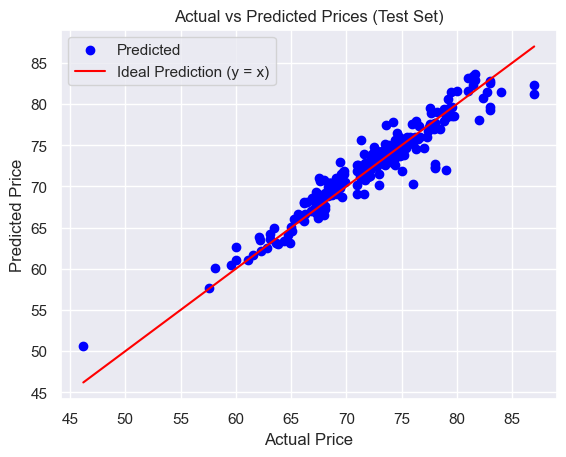

In [104]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted for Test Data
plt.scatter(y_test, y_test_predict, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction (y = x)')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Test Set)")
plt.legend()
plt.show()

In [ ]:
final_model = rf_model
filename = 'Mobile price prediction.sav'
pickle.dump(final_model, open(filename, 'wb'))